In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [17]:
df = pd.read_csv('epa-sea-level.csv', delimiter = ',')
df.head(15)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


In [3]:
len(df)

134

In [4]:
df.isnull().sum().sort_values(ascending = False)

NOAA Adjusted Sea Level     113
Upper Error Bound             0
Lower Error Bound             0
CSIRO Adjusted Sea Level      0
Year                          0
dtype: int64

In [18]:
df.drop('NOAA Adjusted Sea Level', axis=1, inplace = True)

In [19]:
df.sample(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound
6,1886,0.437008,-0.381890,1.255906
43,1923,2.000000,1.488189,2.511811
86,1966,4.397638,4.137795,4.657480
40,1920,1.905512,1.393701,2.417323
79,1959,4.358268,4.102362,4.614173
20,1900,1.125984,0.405512,1.846457
114,1994,6.500000,6.236220,6.763780
125,2005,7.744094,7.472441,8.015748
41,1921,1.988189,1.472441,2.503937
26,1906,1.251969,0.673228,1.830709


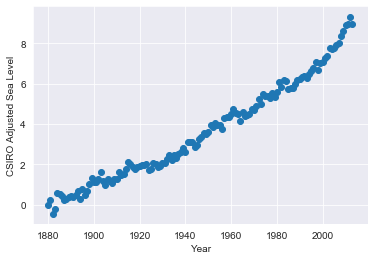

In [14]:
#using scatterplot with matplotlib
sns.set_style('darkgrid')
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

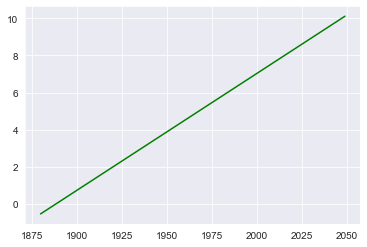

In [20]:
line_regre = pd.Series([int(x) for x in range(1880, 2050)])
#Create first line of best fit
slope, intercept, r_value, p_value, std_err = linregress(df['Year'],
                                                        df['CSIRO Adjusted Sea Level'])
plt.plot(line_regre, intercept + slope*line_regre, 
        'g', label = 'fitted line')
plt.show()

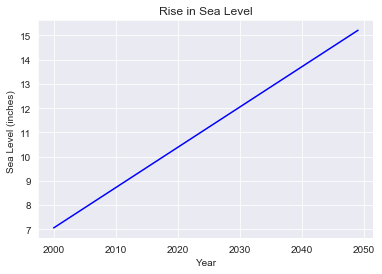

In [21]:
new = df[df['Year'] >= 2000 ]
slope, intercept, r_value, p_value, std_err = linregress(new['Year'],
                                                        new['CSIRO Adjusted Sea Level'])
line_regre2 = pd.Series([int(x) for x in range(2000, 2050)])
new.append(line_regre2, ignore_index = True)
plt.plot(line_regre2, intercept + slope*line_regre2, 
        'r', label = 'fitted line', color = 'blue')
plt.xlabel("Year")
plt.ylabel("Sea Level (inches) ")
plt.title('Rise in Sea Level')
plt.show()